____________________________________________________

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import MetaTrader5 as mt5

from datetime import datetime

In [2]:
# INICIA O METATRADER5

if(mt5.initialize()):
    print("MetaTrader5 iniciado e conectado com exito!!")
else:
    print("ERRO ao iniciar MetaTrader5. Cod de erro:", mt5.last_error())

MetaTrader5 iniciado e conectado com exito!!


In [3]:
# CRIA UM DATAFRAME COM OS 10K PASSOS ANTERIORES 

passos = 10000

data = datetime.now()

ativo = "WING23"


# Cria o DataFrame que será usado

# Puxa os dados
df = mt5.copy_rates_from(ativo, mt5.TIMEFRAME_M1, data, passos)

# Cria o DataFrame com os dados
df = pd.DataFrame(df)

# Ajusta a coluna "time"
df["time"] = pd.to_datetime(df["time"], unit='s')

# Transforma time em index
#df1.set_index("time", inplace = True)

In [4]:
print("==================> df ", ativo, "<==================")
df

==================> df  WING23 <==================


,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-12-27 11:50:00,109580.0,109610.0,109440.0,109445.0,18012,5,51228
1,2022-12-27 11:51:00,109450.0,109500.0,109435.0,109475.0,7846,5,24455
2,2022-12-27 11:52:00,109480.0,109575.0,109445.0,109560.0,8731,5,25161
3,2022-12-27 11:53:00,109560.0,109640.0,109540.0,109635.0,10207,5,29042
4,2022-12-27 11:54:00,109635.0,109690.0,109600.0,109605.0,11659,5,33850
...,...,...,...,...,...,...,...,...
9995,2023-01-20 18:21:00,112890.0,112960.0,112860.0,112940.0,2663,5,7112
9996,2023-01-20 18:22:00,112940.0,112950.0,112895.0,112940.0,1635,5,3410
9997,2023-01-20 18:23:00,112940.0,112980.0,112915.0,112965.0,1262,5,2937
9998,2023-01-20 18:24:00,112965.0,112965.0,112930.0,112965.0,673,5,1802


In [5]:
df_reserva = pd.DataFrame()
df_reserva = df

In [6]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-12-27 11:50:00,109580.0,109610.0,109440.0,109445.0,18012,5,51228
1,2022-12-27 11:51:00,109450.0,109500.0,109435.0,109475.0,7846,5,24455
2,2022-12-27 11:52:00,109480.0,109575.0,109445.0,109560.0,8731,5,25161
3,2022-12-27 11:53:00,109560.0,109640.0,109540.0,109635.0,10207,5,29042
4,2022-12-27 11:54:00,109635.0,109690.0,109600.0,109605.0,11659,5,33850
...,...,...,...,...,...,...,...,...
9995,2023-01-20 18:21:00,112890.0,112960.0,112860.0,112940.0,2663,5,7112
9996,2023-01-20 18:22:00,112940.0,112950.0,112895.0,112940.0,1635,5,3410
9997,2023-01-20 18:23:00,112940.0,112980.0,112915.0,112965.0,1262,5,2937
9998,2023-01-20 18:24:00,112965.0,112965.0,112930.0,112965.0,673,5,1802


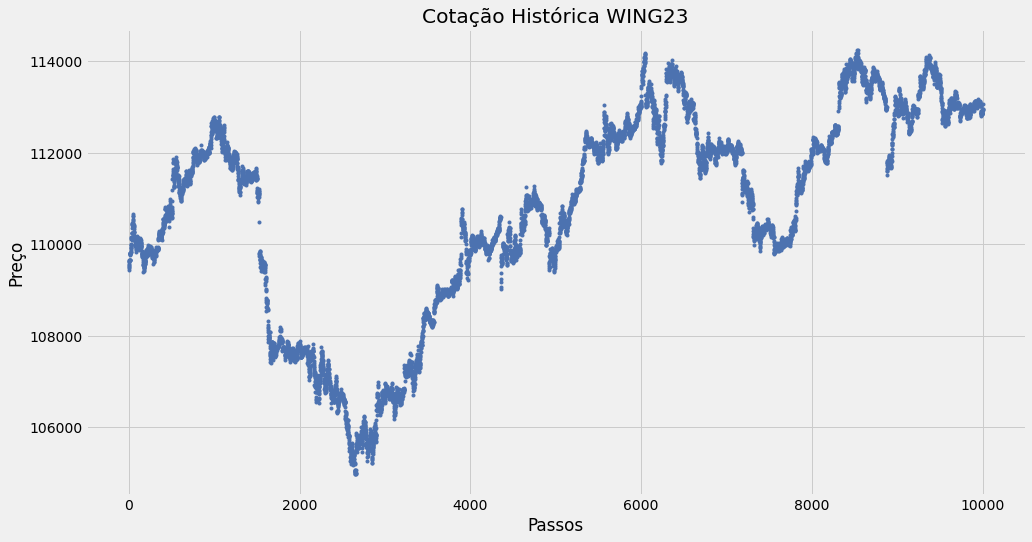

In [7]:
# Carregando a base de dados e fazendo os checks iniciais

plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (15, 8))
    plt.plot(df["close"],".", linewidth = 0.01)
    plt.xlabel("Passos")
    plt.ylabel("Preço")
    plt.title("Cotação Histórica " + ativo)

In [8]:
### Excluir outros

In [9]:
df["volume"] = df["real_volume"]/df['tick_volume']

In [10]:
df = df.drop(columns=['tick_volume','real_volume','spread','time'])

colunas = ['open', 'high', 'low', 'close', 'volume']
df = df.reindex(columns=colunas)

### Cria alvo

In [11]:
#deslocamentos futuros para o alvo
deslocamento = 1

In [12]:
df['alvo'] = df['close'].shift(-deslocamento)

### Cria o df perdido
O tamanho dele dependerá do valor deslocado para o alvo

In [13]:
df_perdido = df.tail(1)
df_perdido

,open,high,low,close,volume,alvo
9999,113060.0,113060.0,113060.0,113060.0,6.665039,NaN


### Removendo o df perdido do df original

In [14]:
df = df.dropna(axis = 0) 

### Normalizações

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Seleciona as colunas de interesse
data = df[['open', 'high', 'low', 'close', 'volume','alvo']]

# Aplica a normalização StandardScaler
data_scaled = scaler.fit_transform(data)

# Atribui os valores normalizados ao DataFrame
df[['open', 'high', 'low', 'close', 'volume','alvo']] = data_scaled

#Desnormaliza
#data_original = scaler.inverse_transform(data_scaled)
#df[['open', 'high', 'low', 'close', 'volume']] = data_original

In [16]:
df

,open,high,low,close,volume,alvo
0,-0.520273,-0.527460,-0.562089,-0.580524,-0.455515,-0.567334
1,-0.578048,-0.576396,-0.564307,-0.567194,0.204432,-0.529567
2,-0.564716,-0.543031,-0.559870,-0.529425,-0.364311,-0.496242
3,-0.529162,-0.514114,-0.517714,-0.496099,-0.452616,-0.509572
4,-0.495830,-0.491871,-0.491090,-0.509429,-0.312207,-0.554005
...,...,...,...,...,...,...
9994,0.946324,0.938386,0.955513,0.950238,-1.336205,0.972259
9995,0.950768,0.962854,0.955513,0.972455,-0.875119,0.972259
9996,0.972989,0.958405,0.971044,0.972455,-2.290588,0.983368
9997,0.972989,0.971751,0.979919,0.983563,-1.705981,0.983368


### Criar Modelo de Regressão para prever o proximo valor de close

In [17]:
from sklearn.model_selection import train_test_split

# Separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df[['open', 'high', 'low', 'close','volume']], df['alvo'], test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

# Instancia o modelo de regressão linear
model = LinearRegression()

# Treina o modelo com os dados de treinamento
model.fit(X_train, y_train)


LinearRegression()

In [19]:
from sklearn.linear_model import LinearRegression

# Instancia o modelo de regressão linear
model = LinearRegression()

# Treina o modelo com os dados de treinamento
model.fit(X_train, y_train)


LinearRegression()

In [20]:
X_train

,open,high,low,close,volume
9253,1.115205,1.096315,1.108604,1.094649,-0.496936
1561,-0.500274,-0.520787,-0.511058,-0.522760,-1.958428
1670,-1.393565,-1.388284,-1.389670,-1.391450,-1.022009
6086,1.179646,1.180840,1.190697,1.176853,-0.588575
7332,-0.224732,-0.211603,-0.213750,-0.211720,-0.200350
...,...,...,...,...,...
5734,0.717446,0.715951,0.722548,0.723623,-0.343486
5191,0.126363,0.110928,0.110182,0.092655,0.578358
5390,0.624117,0.613631,0.636018,0.625867,1.511283
860,0.575231,0.571368,0.582769,0.579211,-0.412861


In [21]:
# Faz previsões com os dados de teste
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcula o MSE
mse = mean_squared_error(y_test, y_pred)

# Calcula o R²
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R²: ", r2)


Mean Squared Error:  0.0007548871567424777
R²:  0.9992293536089428


### Testando previsão com o df perdido

In [23]:
df_perdido

,open,high,low,close,volume,alvo
9999,113060.0,113060.0,113060.0,113060.0,6.665039,NaN


In [24]:
# carregando novos dados
#new_data = df_perdido

# Normalizando os novos dados
new_data_scaled = scaler.transform(data)

In [25]:
df_perdido = df_perdido.drop(columns=['alvo'])

In [26]:
# Fazendo previsões com o modelo treinado
pred_df_perdido = model.predict(df_perdido)


In [27]:
pred_df_perdido

array([113022.32145177])

### Nova previsão do Todo

In [28]:
df_reserva

,time,open,high,low,close,tick_volume,spread,real_volume,volume
0,2022-12-27 11:50:00,109580.0,109610.0,109440.0,109445.0,18012,5,51228,2.844104
1,2022-12-27 11:51:00,109450.0,109500.0,109435.0,109475.0,7846,5,24455,3.116875
2,2022-12-27 11:52:00,109480.0,109575.0,109445.0,109560.0,8731,5,25161,2.881800
3,2022-12-27 11:53:00,109560.0,109640.0,109540.0,109635.0,10207,5,29042,2.845302
4,2022-12-27 11:54:00,109635.0,109690.0,109600.0,109605.0,11659,5,33850,2.903336
...,...,...,...,...,...,...,...,...,...
9995,2023-01-20 18:21:00,112890.0,112960.0,112860.0,112940.0,2663,5,7112,2.670672
9996,2023-01-20 18:22:00,112940.0,112950.0,112895.0,112940.0,1635,5,3410,2.085627
9997,2023-01-20 18:23:00,112940.0,112980.0,112915.0,112965.0,1262,5,2937,2.327258
9998,2023-01-20 18:24:00,112965.0,112965.0,112930.0,112965.0,673,5,1802,2.677563


In [29]:
df_reserva["volume"] = df_reserva["real_volume"]/df_reserva['tick_volume']
df_reserva = df_reserva.drop(columns=['tick_volume','real_volume','spread','time'])

colunas = ['open', 'high', 'low', 'close', 'volume']
df_reserva = df_reserva.reindex(columns=colunas)

In [30]:
df_reserva

,open,high,low,close,volume
0,109580.0,109610.0,109440.0,109445.0,2.844104
1,109450.0,109500.0,109435.0,109475.0,3.116875
2,109480.0,109575.0,109445.0,109560.0,2.881800
3,109560.0,109640.0,109540.0,109635.0,2.845302
4,109635.0,109690.0,109600.0,109605.0,2.903336
...,...,...,...,...,...
9995,112890.0,112960.0,112860.0,112940.0,2.670672
9996,112940.0,112950.0,112895.0,112940.0,2.085627
9997,112940.0,112980.0,112915.0,112965.0,2.327258
9998,112965.0,112965.0,112930.0,112965.0,2.677563


In [31]:
df_reserva['alvo'] = df_reserva['close'].shift(-deslocamento)

In [34]:
df_reserva

,open,high,low,close,volume,alvo
0,109580.0,109610.0,109440.0,109445.0,2.844104,109475.0
1,109450.0,109500.0,109435.0,109475.0,3.116875,109560.0
2,109480.0,109575.0,109445.0,109560.0,2.881800,109635.0
3,109560.0,109640.0,109540.0,109635.0,2.845302,109605.0
4,109635.0,109690.0,109600.0,109605.0,2.903336,109505.0
...,...,...,...,...,...,...
9995,112890.0,112960.0,112860.0,112940.0,2.670672,112940.0
9996,112940.0,112950.0,112895.0,112940.0,2.085627,112965.0
9997,112940.0,112980.0,112915.0,112965.0,2.327258,112965.0
9998,112965.0,112965.0,112930.0,112965.0,2.677563,113060.0


In [35]:
scaler = StandardScaler()

# Seleciona as colunas de interesse
data_reserva = df_reserva[['open', 'high', 'low', 'close', 'volume','alvo']]

# Aplica a normalização StandardScaler
data_scaled_reserva = scaler.fit_transform(data_reserva)

# Atribui os valores normalizados ao DataFrame
df_reserva[['open', 'high', 'low', 'close', 'volume','alvo']] = data_scaled_reserva

#Desnormaliza
#data_original = scaler.inverse_transform(data_scaled)
#df[['open', 'high', 'low', 'close', 'volume']] = data_original

In [36]:
df_reserva

,open,high,low,close,volume,alvo
0,-0.520374,-0.527561,-0.562191,-0.580625,-0.454664,-0.567334
1,-0.578149,-0.576496,-0.564409,-0.567295,0.202781,-0.529567
2,-0.564817,-0.543131,-0.559972,-0.529526,-0.363806,-0.496242
3,-0.529263,-0.514215,-0.517816,-0.496200,-0.451776,-0.509572
4,-0.495931,-0.491971,-0.491192,-0.509531,-0.311899,-0.554005
...,...,...,...,...,...,...
9995,0.950663,0.962752,0.955404,0.972350,-0.872678,0.972259
9996,0.972884,0.958303,0.970935,0.972350,-2.282782,0.983368
9997,0.972884,0.971650,0.979810,0.983458,-1.700390,0.983368
9998,0.983995,0.964977,0.986466,0.983458,-0.856069,1.025579


In [38]:
df_reserva = df_reserva.drop(columns=['alvo'])

In [39]:
pred_df_reserva = model.predict(df_reserva)

In [40]:
df1 = pd.DataFrame()

In [41]:
df1['close'] = df_reserva['close']
df1['open'] = df_reserva['open']
df1['low'] = df_reserva['low']
df1['high'] = df_reserva['high']
df1['volume'] = df_reserva['volume']

In [45]:
df1['alvo'] = pred_df_reserva

In [43]:
colunas = ['open', 'high', 'low', 'close', 'volume','alvo']
df1 = df_reserva.reindex(columns=colunas)

In [46]:
df1

,open,high,low,close,volume,alvo
0,-0.520374,-0.527561,-0.562191,-0.580625,-0.454664,-0.579340
1,-0.578149,-0.576496,-0.564409,-0.567295,0.202781,-0.567843
2,-0.564817,-0.543131,-0.559972,-0.529526,-0.363806,-0.528299
3,-0.529263,-0.514215,-0.517816,-0.496200,-0.451776,-0.495016
4,-0.495931,-0.491971,-0.491192,-0.509531,-0.311899,-0.509473
...,...,...,...,...,...,...
9995,0.950663,0.962752,0.955404,0.972350,-0.872678,0.973902
9996,0.972884,0.958303,0.970935,0.972350,-2.282782,0.976945
9997,0.972884,0.971650,0.979810,0.983458,-1.700390,0.986525
9998,0.983995,0.964977,0.986466,0.983458,-0.856069,0.985132


In [48]:
#scaler = StandardScaler()

# Seleciona as colunas de interesse
#data_reserva = df_reserva[['open', 'high', 'low', 'close', 'volume','alvo']]

# Aplica a normalização StandardScaler
#data_scaled_reserva = scaler.fit_transform(data_reserva)

# Atribui os valores normalizados ao DataFrame
#df_reserva[['open', 'high', 'low', 'close', 'volume','alvo']] = data_scaled_reserva

#Desnormaliza
data_original_reserva = scaler.inverse_transform(data_scaled_reserva)
df1[['open', 'high', 'low', 'close', 'volume','alvo']] = data_original_reserva

In [49]:
df1

,open,high,low,close,volume,alvo
0,109580.0,109610.0,109440.0,109445.0,2.844104,109475.0
1,109450.0,109500.0,109435.0,109475.0,3.116875,109560.0
2,109480.0,109575.0,109445.0,109560.0,2.881800,109635.0
3,109560.0,109640.0,109540.0,109635.0,2.845302,109605.0
4,109635.0,109690.0,109600.0,109605.0,2.903336,109505.0
...,...,...,...,...,...,...
9995,112890.0,112960.0,112860.0,112940.0,2.670672,112940.0
9996,112940.0,112950.0,112895.0,112940.0,2.085627,112965.0
9997,112940.0,112980.0,112915.0,112965.0,2.327258,112965.0
9998,112965.0,112965.0,112930.0,112965.0,2.677563,113060.0


In [ ]:
#Desnormaliza
data_original = scaler.inverse_transform(data2)
df1[['open', 'high', 'low', 'close', 'volume','alvo']] = data_original

In [ ]:
df1

In [ ]:
plt.plot(df1['close'])

____________________________________________________